<a href="https://colab.research.google.com/github/pretty-neat-org/siap/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/SIAP

Mounted at /content/gdrive
config.json  data_mini_10k.csv	file.csv	   in_domain_train.tsv
data.csv     file5m.zip		glove.6B.300d.txt  pytorch_model.bin


## Data analysis on reddit dataset

5 million rows out of 54 million total

Load the data

In [2]:
import pandas as pd

!apt install unzip
!unzip  gdrive/MyDrive/SIAP/file5m.zip -d file

df = pd.read_csv('file/file5m.csv')
print(df.columns)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Archive:  gdrive/MyDrive/SIAP/file5m.zip
  inflating: file/file5m.csv         
Index(['created_utc', 'ups', 'subreddit_id', 'link_id', 'name', 'score_hidden',
       'author_flair_css_class', 'author_flair_text', 'subreddit', 'id',
       'removal_reason', 'gilded', 'downs', 'archived', 'author', 'score',
       'retrieved_on', 'body', 'distinguished', 'edited', 'controversiality',
       'parent_id'],
      dtype='object')


Analyse comment lengths

In [3]:
# message length
df['comment_length'] = df['body'].apply(lambda body: len(str(body)))
df[['body','comment_length']].head()


,body,comment_length
0,くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな,29
1,gg this one's over. off to watch the NFL draft...,54
2,Are you really implying we return to those tim...,226
3,No one has a European accent either because i...,119
4,"That the kid ""..reminds me of Kevin."" so sad...",50


Text(0.5, 1.0, 'Comment lengths')

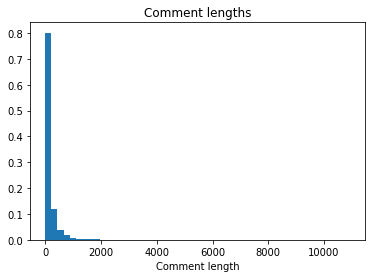

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.hist(df['comment_length'], bins=50, weights=np.ones(len(df))/len(df))
plt.xlabel('Comment length')
plt.title('Comment lengths')

In [5]:
# extract controversial and non controversial
controversial = df['body'].iloc[(df['controversiality'] == 1).values]
non_controversial = df['body'].iloc[(df['controversiality'] == 0).values]
print(controversial[:10])
print(non_controversial[:10])

45     Because we aren't responsible for the actions ...
57     I honestly wouldn't have believed it if I didn...
61     There is also many intelligence service player...
160    The implications of that varies between cultur...
171    *I am a bot whose sole purpose is to improve t...
176    You're just trying to get to the front page.  ...
214    For those about to lynch this guy [here](http:...
365    True, though you can find papers about early c...
477    Yes. After days of dealing with car accidents ...
559    Icefrog went fucking mad. \n\nI have literally...
Name: body, dtype: object
0                      くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな
1    gg this one's over. off to watch the NFL draft...
2    Are you really implying we return to those tim...
3    No one has a European accent either  because i...
4    That the kid "..reminds me of Kevin."   so sad...
5    Haha, i was getting nauseous from it, if that ...
6    After reading this, I wholeheartedly believe y...
7       Let's do th

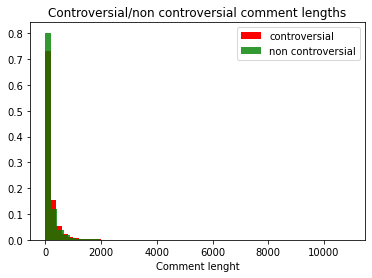

In [6]:
plt.hist(controversial.apply(lambda x: len(str(x))),
         bins=50,
         weights=np.ones(len(controversial)) / len(controversial),
         facecolor='r',
         label='controversial')
plt.hist(non_controversial.apply(lambda x: len(str(x))),
         bins=50,
         weights=np.ones(len(non_controversial)) / len(non_controversial),
         facecolor='g',
         alpha=0.8,
         label='non controversial')
plt.xlabel('Comment lenght')
plt.ylabel('')
plt.title('Controversial/non controversial comment lengths')
plt.legend()

Most common words in controversial and non controversial comments

In [7]:
# most common words in controversial comments
# import nltk
# nltk.download('punkt')
# from nltk.corpus import stopwords
# from nltk import word_tokenize
# nltk.download('stopwords')
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# cleaning

cont_df = df[df.controversiality == 1]
cont_df['body'] = cont_df['body'].str.replace(r'http\S+', '')
cont_df['body'] = cont_df['body'].str.replace(r'[^\w\s]', '')
cont_df['body'] = cont_df['body'].str.replace(r"([^\x00-\x7F])+", '')
cont_df['body'] = cont_df['body'].str.lower()


# controversial = df['body'].iloc[(df['controversiality'] == 1).values]
# non_controversial = df['body'].iloc[(df['controversiality'] == 0).values]
# controversial_tokens = []
# controversial_tokens_processed = []
# for contr in controversial:
#     if contr not in stop_words:
#         controversial_tokens += nltk.tokenize.word_tokenize(str(contr))
# for c in controversial_tokens:
#    if c.lower() not in stop_words:
#      controversial_tokens_processed.append(c.lower())

# non_contr_tokens = []
# non_contr_tokens_processed = []
# for non_contr in non_controversial:
#     if non_contr not in stop_words:
#       non_contr_tokens += nltk.tokenize.word_tokenize(str(non_contr))
# for nc in non_contr_tokens:
#   if nc.lower() not in stop_words:
#     non_contr_tokens_processed.append(nc.lower())

# most_common_tokens_in_controversial = Counter(controversial_tokens_processed).most_common(20)
# # most_common_tokens_in_non_controversial = Counter(non_contr_tokens_processed).most_common(20)
# print(most_common_tokens_in_controversial)
# # print(most_common_tokens_in_non_controversial)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [8]:
import spacy
from tqdm import tqdm


# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")
cont = cont_df['body'].dropna()

# # splitting and removing punctuation
# controversial = cont_df['body'].str.split(' ')

controversial_cleaned = []

# for text in controversial:
#     text = [str(x).strip(string.punctuation) for x in text]
#     controversial_cleaned.append(text)

# text_controversial = [" ".join(text) for text in controversial_cleaned]
# final = " ".join(text_controversial)
# final[:500]

for text in tqdm(cont):
    doc = nlp(text)
    controversial_cleaned.append([token.lemma_ for token in doc if token.pos_ == "VERB" or  token.pos_ == "NOUN"])
text_controversial = [" ".join(text) for text in controversial_cleaned]
final = " ".join(text_controversial)

# generate wordcloud

# stopwords = set(STOPWORDS)
# stopwords.update(["one", "well", "thats", "want", "need", "make", "say", "look", "thing", "dont", "im", "think",
#                   "youre", "doesnt", "didnt", "isnt", "much", "even", "know", "said", "though", "go", "actually",
#                   "hes", "us", "got", "probably", "many", "already"])



100%|██████████| 123478/123478 [1:06:48<00:00, 30.81it/s]


In [9]:
import pickle
with open("test.txt", "wb") as fp:   #Pickling
  pickle.dump(controversial_cleaned, fp)
with open("test.txt", "rb") as fp:   # Unpickling
  b = pickle.load(fp)
b

[['action',
  'forebear',
  'should',
  'help',
  'people',
  'race',
  'love',
  'man',
  'have',
  'try',
  'give',
  'advantage',
  'give',
  'thing',
  'action',
  'diversity',
  'quota',
  'scholarship',
  'people',
  'one',
  'want',
  'change',
  'community',
  'lash',
  'problem',
  'solution',
  'want',
  'abolish',
  'police',
  'law',
  'remove',
  'punishment',
  'crime',
  'release',
  'criminal',
  'force',
  'people',
  'leave',
  'neighborhood',
  'people',
  'start',
  'move',
  'consequence',
  'increase',
  'crime',
  'cause',
  'problem',
  'lie',
  'place',
  'action',
  'community',
  'individual',
  'use',
  'race',
  'excuse',
  'commit',
  'crime',
  'prejudice',
  'day',
  'people',
  'make',
  'life',
  'consequence',
  'digress',
  'one',
  'will',
  'fix',
  'riot',
  'crime',
  'make',
  'racist',
  'way',
  'could',
  'change',
  'would',
  'thought',
  'police',
  'system',
  'level',
  'change',
  'mind',
  'individual',
  'be',
  'rioterscriminal',
  '

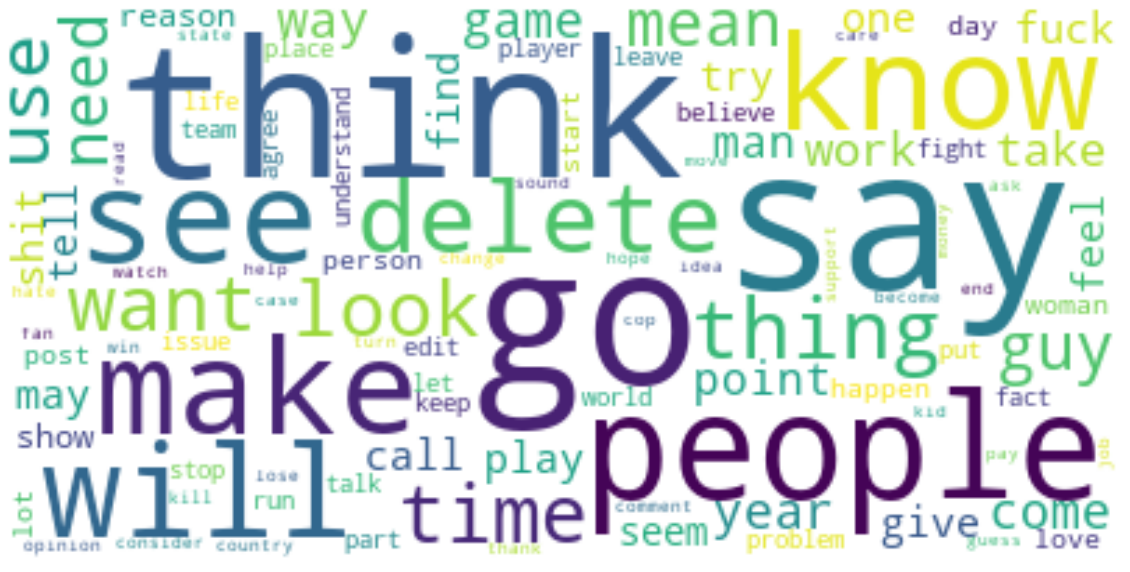

Word: people, count: 20534
Word: think, count: 13456
Word: will, count: 12878
Word: see, count: 9875
Word: delete, count: 9609
Word: want, count: 8798
Word: time, count: 8515
Word: thing, count: 7966
Word: game, count: 7750
Word: use, count: 6593
Word: look, count: 6424
Word: need, count: 6059
Word: year, count: 6032
Word: way, count: 6029
Word: guy, count: 5832
Word: mean, count: 5538
Word: play, count: 5388
Word: give, count: 5287
Word: try, count: 5217
Word: come, count: 5098
Word: work, count: 5078
Word: point, count: 4920
Word: man, count: 4630
Word: shit, count: 4428
Word: fuck, count: 4370
Word: lot, count: 4279
Word: post, count: 4095
Word: feel, count: 3991
Word: like, count: 3988
Word: one, count: 3947


In [17]:
wordcloud = WordCloud( background_color="white", max_font_size=70, max_words=100).generate(final)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

stopwords = ['be', 'would', 'can', 's', 'get', 'make', 'say', 'go', 'know', 'have' , 'could', 'should', 
             'take', 'do', 'may' ]
filtered_words = [word for word in final.split() if word not in stopwords]
counted_words = Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Dataframe column correlations

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   created_utc             int64  
 1   ups                     int64  
 2   subreddit_id            object 
 3   link_id                 object 
 4   name                    object 
 5   score_hidden            int64  
 6   author_flair_css_class  object 
 7   author_flair_text       object 
 8   subreddit               object 
 9   id                      object 
 10  removal_reason          float64
 11  gilded                  int64  
 12  downs                   int64  
 13  archived                int64  
 14  author                  object 
 15  score                   int64  
 16  retrieved_on            int64  
 17  body                    object 
 18  distinguished           object 
 19  edited                  int64  
 20  controversiality        int64  
 21  parent_id               object 

In [19]:
df.describe()

,created_utc,ups,score_hidden,removal_reason,gilded,downs,archived,score,retrieved_on,edited,controversiality,comment_length
count,5.000000e+06,5.000000e+06,5.000000e+06,0.0,5.000000e+06,5000000.0,5000000.0,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.430567e+09,5.768677e+00,1.852000e-03,NaN,3.220000e-04,0.0,0.0,5.768677e+00,1.432738e+09,4.317847e+07,2.469600e-02,1.646514e+02
std,7.828005e+04,4.852130e+01,4.299501e-02,NaN,2.283630e-02,0.0,0.0,4.852130e+01,1.538279e+05,2.447605e+08,1.551970e-01,3.072365e+02
min,1.430438e+09,-1.034000e+03,0.000000e+00,NaN,0.000000e+00,0.0,0.0,-1.034000e+03,1.432703e+09,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.430502e+09,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,1.000000e+00,1.432716e+09,0.000000e+00,0.000000e+00,3.200000e+01
50%,1.430568e+09,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,1.000000e+00,1.432729e+09,0.000000e+00,0.000000e+00,7.800000e+01
75%,1.430631e+09,3.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,3.000000e+00,1.432742e+09,0.000000e+00,0.000000e+00,1.780000e+02
max,1.430701e+09,5.720000e+03,1.000000e+00,NaN,2.700000e+01,0.0,0.0,5.720000e+03,1.435445e+09,1.435315e+09,1.000000e+00,1.092000e+04


In [28]:
df['distinguished'] = df['distinguished'].fillna(0)
df['distinguished'] = pd.Categorical(df['distinguished'], categories=df['distinguished'].unique()).codes
df['author_flair_text'] = df['author_flair_text'].fillna(0)
df['author_flair_text'] = pd.Categorical(df['author_flair_text'], categories=df['author_flair_text'].unique()).codes
df['subreddit'] = df['subreddit'].fillna(0)
df['subreddit'] = pd.Categorical(df['subreddit'], categories=df['subreddit'].unique()).codes
df['author'] = df['author'].fillna(0)
df['author'] = pd.Categorical(df['author'], categories=df['author'].unique()).codes

[0]


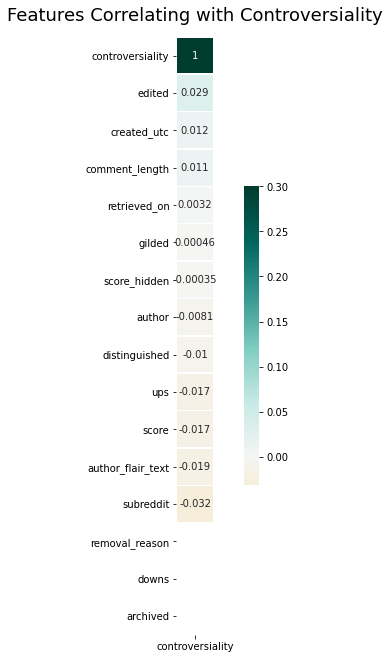

In [25]:
import seaborn as sns

corr = df.corr(method ='pearson')[['controversiality']].sort_values(by='controversiality', ascending=False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,  cmap='BrBG', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.set_title('Features Correlating with Controversiality', fontdict={'fontsize':18}, pad=16);